In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Display as many columns as possible
pd.options.display.max_columns = 999
shopify_data = pd.read_csv("shopify_orders_export_20180207.csv", 
                           low_memory=False, 
                           dtype={'Lineitem sku': 'str', 'Name': 'str'},
                           parse_dates = ['Paid at', 'Created at'])

In [49]:
# Import master list
sku_master = pd.read_excel("C:/Users/limzi/OneDrive/Forecasting & Reporting/PCSG Master List.xlsx", sheet_name='SKU List' ).dropna(subset = 'SKU')
# Import bundle sheet of masterlist file
bundle_master = pd.read_excel("C:/Users/limzi/OneDrive/Forecasting & Reporting/PCSG Master List.xlsx",
                              sheet_name='Bundles' ).rename(columns = {'Parent SKU': "parent_sku",
                                                                      'Parent Name': 'parent_name',
                                                                      'Quantity': 'child_quantity',
                                                                      'Child SKU': "child_sku",
                                                                      'Child Name': 'child_name'}).astype({'child_sku': 'str',
                                                                                                           'parent_sku': 'str'})
# Use (how = "Left") in order to duplicate the line item information on each composite SKU
shopify_data_merge = pd.merge(shopify_data, bundle_master, left_on="Lineitem sku", right_on = 'parent_sku', how='left')

# fill those NAs in parent_sku column (i.e. individual SKUs)  with their original sku names
shopify_data_merge['parent_sku'].fillna(shopify_data_merge['Lineitem sku'], inplace=True)
shopify_data_merge['child_sku'].fillna(shopify_data_merge['Lineitem sku'], inplace=True)

# same concept, repeat the quantities with individual SKUs in the child_quantity column
shopify_data_merge['child_quantity'].fillna(shopify_data_merge['Lineitem quantity'], inplace=True)

# shopify_data_merge['total_quantity'].fillna(shopify_data_merge['Lineitem quantity'], inplace = True)
# Calculates the actual quantity of composite SKUs sold (since, e.g., there might be more than one 2010s sold in a bundle)
shopify_data_merge['child_subtotal_quantity'] =  shopify_data_merge['child_quantity'] * shopify_data_merge['Lineitem quantity']

# The following is required for dollar calculation
shopify_data_merge['Discount Unit Price'].fillna(shopify_data_merge['Lineitem price'], inplace=True)
shopify_data_merge['Unit Price'].fillna(shopify_data_merge['Lineitem compare at price'], inplace=True)
shopify_data_merge['child_subtotal'] =  shopify_data_merge['child_subtotal_quantity'] * shopify_data_merge['Discount Unit Price']



# Create a copy of DF so that alterations will not affect the final df
shopify_data_debundled = shopify_data_merge.copy()

In [50]:
email_purchase_matrix = shopify_data_debundled.groupby(['Email', 'child_sku'])['child_subtotal_quantity'].sum().reset_index().pivot(index='Email', columns='child_sku', values='child_subtotal_quantity').fillna(0)

In [51]:
email_purchase_matrix['total_units'] = email_purchase_matrix.sum(axis = 1)

In [52]:
email_purchase_matrix.sort_values('total_units', ascending = False)

child_sku,1000,1001,1009,1050,1051,1059,1100,1101,1109,1150,1151,1159,1210,1219,1250,1259,1310,1319,1350,1359,1460,1469,1560,1569,1620,1710,1719,1720,1860,1869,1900,1907,1909,2000,2010,2017,2019,2040,2049,2050,2051,2059,2060,2069,2120,2130,2140,2150,2320,2329,2330,2560,2600,2650,2659,2750,2759,2760,2800,2809,3100,3109,3140,3149,3250,3257,3259,3350,3357,3359,3400,3409,3500,3509,3600,3609,3700,3709,5000,5009,5200,5209,5500,5559,5560,5569,5570,5579,5700,5709,5800,5809,5900,5909,6000,6002,6006,6007,6100,6107,6110,6117,6130,6137,6200,6207,6210,6217,6240,7600,7607,7609,7610,7617,7619,7620,7629,7630,7639,7640,7647,7649,7650,7651,7659,7660,7667,7669,7670,7679,7680,7687,7689,7690,7697,7699,7710,7717,7719,7720,7729,7730,7737,7739,7740,7747,7749,7760,7769,7770,7777,7779,7780,7787,7789,7790,7791,7798,7800,7807,7809,7810,7819,7820,7827,7829,7830,7837,7839,7840,7847,7850,7857,7860,7867,7870,7880,7900,7910,7960,7969,7970,7977,7980,8010,8017,8500,8509,8510,8519,8520,8529,8700,8707,8709,8710,8717,8719,8720,8727,8729,8730,8737,8739,8740,8747,8749,8750,8760,9033,9100,9109,9110,9119,9120,9129,9130,9139,9140,9149,9150,91501,91511,91521,91531,91541,91551,91580,91587,9159,9160,91650,91660,91670,9169,9170,9179,9180,9189,92063,92075,92076,9945,CNY1,HARU2017,gc10,total_units
Email,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cheerygarcia@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1600.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1613.0
litepiggy@yahoo.com.sg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,904.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0
elysian.pjl@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

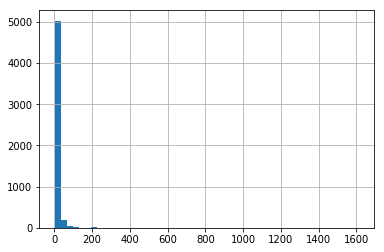

In [56]:
email_purchase_matrix['total_units'].hist(bins = 50)

In [54]:
products_sales_count = shopify_data_debundled.groupby(['child_sku'])['child_subtotal_quantity'].sum().reset_index()
full_size_sales_count = products_sales_count[~products_sales_count['child_sku'].str.endswith(('9', '7', '6', '8'))]
full_size_sales_count.sort_values('child_subtotal_quantity', ascending=False)

,child_sku,child_subtotal_quantity
35,2010,2761.0
151,7770,1488.0
165,7820,1339.0
149,7760,1322.0
97,6002,1251.0
18,1350,1018.0
185,7980,966.0
72,3400,832.0
106,6200,818.0
154,7780,804.0


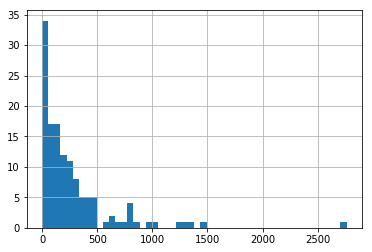

In [55]:
full_size_sales_count['child_subtotal_quantity'].hist(bins=50)

In [77]:
import requests
import json
full_size_skus = products_sales_count[~products_sales_count['child_sku'].str.endswith(('9', '7', '6', '8'))]['child_sku'].unique()
sku_list = shopify_data_debundled['child_sku'].unique()
all_sku_reviews = pd.DataFrame()
for sku in full_size_skus:
    single_query = requests.get('https://pcsg-reviews-api.paulaschoice.tech/product/{}'.format(sku)).text
    single_json = pd.io.json.json_normalize(json.loads(single_query))
    all_sku_reviews = all_sku_reviews.append(single_json)

# all_sku_reviews.to_csv('all_sku_reviews.csv')

,approved,body,id,rating,reviewer_email,reviewer_name,sku,time_created,verified
0,True,This cleanser has a creamy lotion texture that...,06J0EH32oAfe08r0hS5p,5,magsiaw@yahoo.com,Maureen,1000,2018-02-26T09:43:10+08:00,True
1,True,I used this with cotton pads on dry skin to re...,6dMdYKkZjkCbXbv8fOXy,5,fp_kris@yahoo.com.sg,Kris,1000,2018-06-26T03:35:37+08:00,True
2,True,This cleanser was very effective and it had a ...,AQybeyb3uM7kaUfqhp8M,3,oyw98@hotmail.com,wei,1000,2018-06-26T20:34:49+08:00,True
3,True,"like it, but prefer skin recovery cleaner, as ...",fqJt38FeGLK3La8KryY6,4,elfira0628@yahoo.com,elfira,1000,2018-06-29T18:59:07+08:00,True
4,True,A daily essential for my combination skin. Can...,iGIG5GOU4xWb64NUFc6O,5,chongwanjuen@yahoo.com,Chong WJ,1000,2018-03-04T01:20:09+08:00,True
5,True,I have combination skin but this works like a ...,jw5XWj1VLA7XfQe0CBUN,5,chongwanjuen@yahoo.com,Louisa,1000,2018-03-04T01:06:05+08:00,True
6,True,Good!!,lzTMRvxx4BBZ0jhP5hBI,4,holly_redqueen@yahoo.com,UN,1000,2018-06-20T11:11:28+08:00,True
7,True,This cleanser is perfect for my acne prone ski...,mbAb5tOePEmj2RSl8uuI,5,marvvvmarv@gmail.com,Marv,1000,2018-06-26T19:43:45+08:00,True
8,True,"I have very oily skin, which I double cleanse ...",opYt4mWJLaytM2Uuhl98,4,crazyforep@gmail.com,Shufen,1000,2018-03-06T13:53:17+08:00,True
9,True,"Thought it was an alright cleanser, didn't fee...",pjfKzA67yJDCXwdKGCvT,2,annabella.ning@gmail.com,Anna,1000,2018-05-09T02:02:30+08:00,True


In [98]:
reviews_sku_rating = all_sku_reviews[['sku', 'rating']]

In [101]:
reviews_by_sku = pd.DataFrame(reviews_sku_rating.groupby('sku')['rating'].mean())
reviews_by_sku['review_count'] = pd.DataFrame(reviews_sku_rating.groupby('sku')['rating'].count())
reviews_by_sku.sort_values('review_count', ascending=False)

,rating,review_count
sku,,
2010,4.535714,84
7770,4.294118,51
7820,4.250000,44
1350,4.581395,43
7980,4.026316,38
7780,4.363636,33
7760,4.696970,33
3400,4.500000,32
1150,4.400000,30


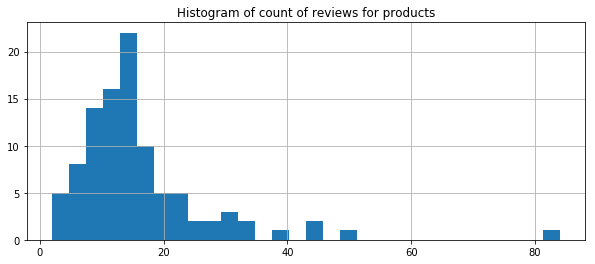

In [120]:
plt.figure(figsize=(10,4))
reviews_by_sku['review_count'].hist(bins=30)
plt.title('Histogram of count of reviews for products');

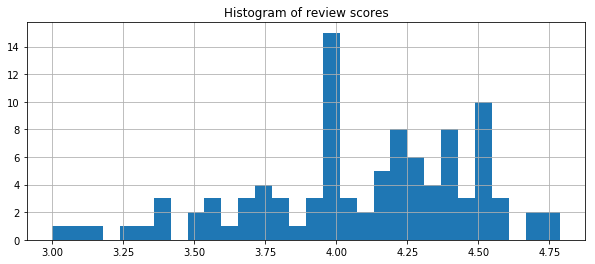

In [119]:
plt.figure(figsize=(10,4))
reviews_by_sku['rating'].hist(bins=30)
plt.title('Histogram of review scores');

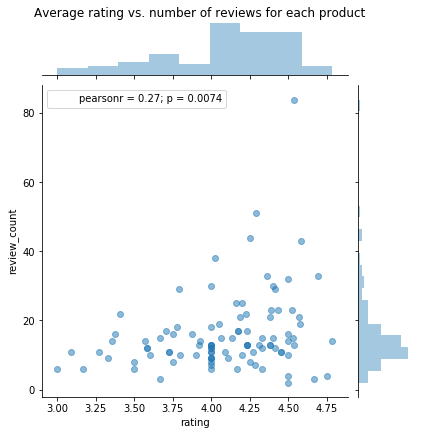

In [133]:
import seaborn as sns
sns.jointplot(x='rating',y='review_count',data=reviews_by_sku,alpha=0.5)
plt.title('Average rating vs. number of reviews for each product', x=-3, y=1.2);

# Product Recommender

In [160]:
user_rating_matrix = pd.read_csv('all_sku_reviews.csv')
user_rating_matrix = user_rating_matrix [['reviewer_email', 'sku', 'rating']].drop_duplicates(subset= ['reviewer_email', 'sku'])
user_rating_pivot = user_rating_matrix.pivot(index='reviewer_email', columns='sku', values='rating')


In [177]:
user_rating_6002 = user_rating_pivot[6002]
user_rating_6002

reviewer_email
316690956@qq.com                       NaN
4n1g3r@gmail.com                       NaN
951643455@qq.com                       NaN
Babyoracle@gmail.com                   NaN
Brendan.phua@live.com                  NaN
Charmaine_287@hotmail.com              NaN
Chayarnee@gmail.com                    NaN
GALZ_PARADISE@HOTMAIL.COM              NaN
Grace_kam@hotmail.com                  NaN
IchimaruRocks@hotmail.com              NaN
Ichimarurocks@hotmail.com              NaN
Kittytalks@gmail.com                   NaN
Kkying1910@gmail.com                   NaN
Leemayee1@gmail.com                    NaN
Rudysbobo@gmail.com                    NaN
Yeelyn@hotmail.com                     NaN
ZaronTay@hotmail.com                   NaN
aatetiker@hotmail.com                  NaN
aber_lim@hotmail.com                   NaN
abigailwong.2015@busines.smu.edu.sg    NaN
abysmdevil@gmail.com                   NaN
ahwish@yahoo.com                       5.0
alicia.jy.lee@gmail.com                

In [178]:
similar_to_6002 = pd.DataFrame(user_rating_pivot.corrwith(user_rating_6002),columns=['Correlation'])
similar_to_6002.dropna().sort_values('Correlation', ascending=False)

C:\Program Files\Python36\lib\site-packages\numpy\lib\function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Program Files\Python36\lib\site-packages\numpy\lib\function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
sku,
1000,1.000000
6002,1.000000
8730,1.000000
5560,1.000000
1250,1.000000
7840,0.870388
5000,0.870388
5500,0.870388
7780,0.866921
